Let's import all the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

Let's Load Data

In [2]:
data=pd.read_csv("zomato.csv",engine='python',on_bad_lines='skip')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.shape

(51155, 17)

In [5]:
data.columns.to_list()


['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

Data Cleaning

In [6]:
data.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(city)':'area'},inplace=True)

Let's drop the irrelevant columns

In [7]:
data.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'],axis=1,inplace=True)

In [8]:
df=data

In [9]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


Let's check for Datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51155 entries, 0 to 51154
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51155 non-null  object
 1   online_order  51155 non-null  object
 2   book_table    51155 non-null  object
 3   rate          43380 non-null  object
 4   votes         51155 non-null  int64 
 5   location      51134 non-null  object
 6   rest_type     50931 non-null  object
 7   cuisines      51110 non-null  object
 8   approx_cost   50811 non-null  object
 9   area          51155 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Let's check for rate columns

In [11]:
#unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '2.4 /5', '4.7 /5',
       '2.2 /5', '2.0 /5', '2.1 /5', '1.8 /5'], dtype=object)

Let's replace all the null and garbage values with numbers

In [12]:
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" /5", "")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")

In [13]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [14]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [15]:
df['approx_cost']=df['approx_cost'].str.replace("nan","NaN")
df['approx_cost']=df['approx_cost'].fillna('NaN')
df['approx_cost']=df['approx_cost'].str.replace(',','')

In [16]:
df['approx_cost'] = df['approx_cost'].astype(float)
df['rate'] = df['rate'].astype(float)


Let's check the data description

In [17]:
df.describe()

,rate,votes,approx_cost
count,41105.000000,51155.000000,50811.000000
mean,3.694088,260.233428,549.401212
std,0.435111,709.252664,434.206349
min,1.800000,0.000000,40.000000
25%,3.400000,6.000000,300.000000
50%,3.700000,39.000000,400.000000
75%,4.000000,189.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [18]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10050
votes               0
location           21
rest_type         224
cuisines           45
approx_cost       344
area                0
dtype: int64

In [19]:
#lets check for the percentage of null values
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.646173
votes            0.000000
location         0.041052
rest_type        0.437885
cuisines         0.087968
approx_cost      0.672466
area             0.000000
dtype: float64

In [20]:
df=df[df["location"].notna()]
df=df[df["rest_type"].notna()]
df=df[df["cuisines"].notna()]
df=df[df["approx_cost"].notna()]

In [21]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9883
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

Let's Handle the Null values in the "rate" columns

In [22]:
df["rate"].describe()

count    40708.000000
mean         3.695556
std          0.434603
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

Let's check for the outliers by statistical method

In [23]:
q1=df['rate'].quantile(0.25)
q3=df['rate'].quantile(0.75)

xyz=q3-q1

lower_range=q1-(1.5*xyz)
upper_range=q3+(1.5*xyz)

outliers=len(df[(df['rate']<lower_range)|(df['rate']>upper_range)])
print("Number of rows having outliers :",outliers)

Number of rows having outliers : 171


In [24]:
df['rate']=df['rate'].fillna(df['rate'].median())
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

### Let's check for the numerical columns

In [25]:
Numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print("There are {} numerical features and their names are {}".format(len(Numerical_features),Numerical_features))                    

There are 3 numerical features and their names are ['rate', 'votes', 'approx_cost']


### Let's check for the distribution of the numerical features

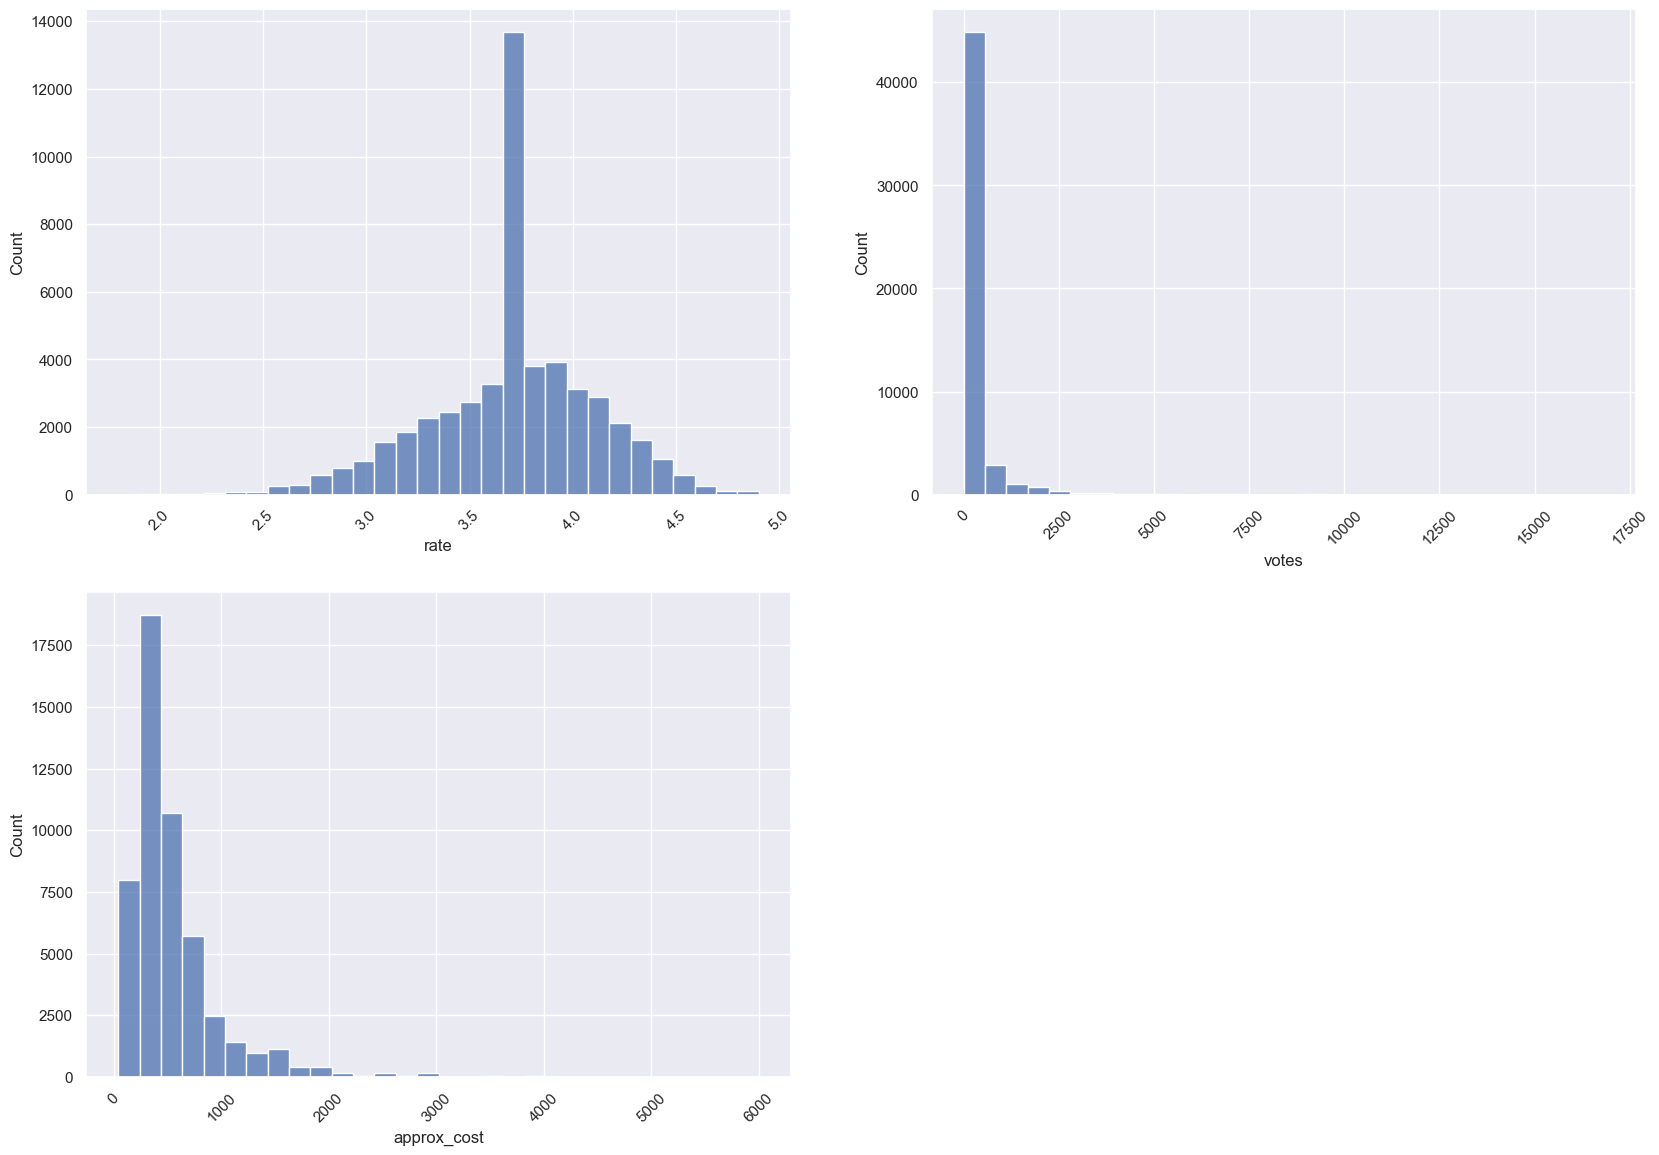

In [26]:
plt.figure(figsize=(20,150))
for i in enumerate(Numerical_features):
    plt.subplot(20,2,i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df,x=i[1],bins=30)
    plt.xticks(rotation=45)

### Reset the index

In [27]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

## Data Visualization

#### Let's check for the most famous restaurants chains in Bangluru

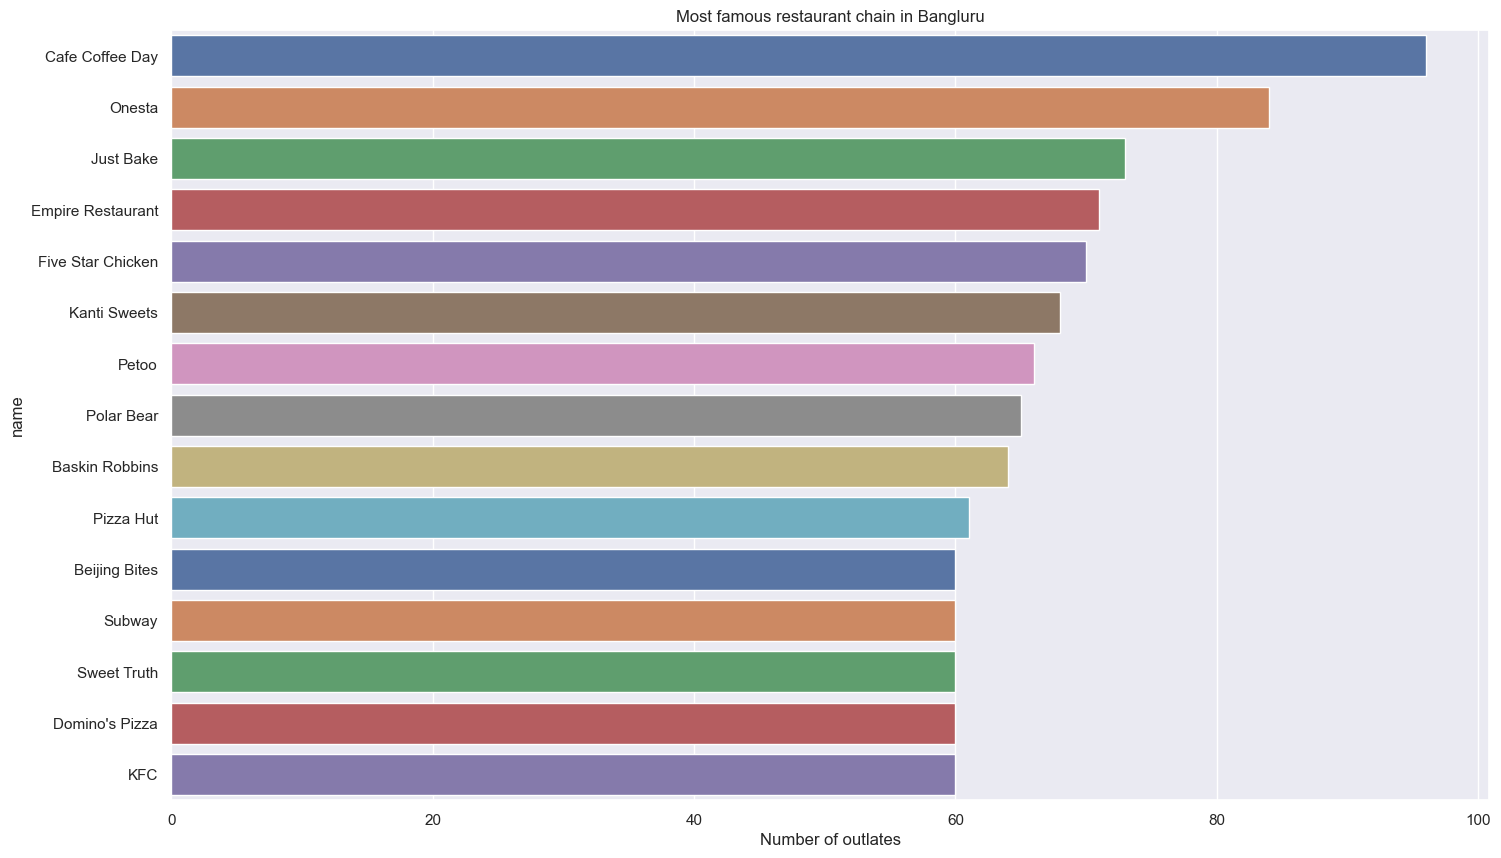

In [28]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurant chain in Bangluru")
plt.xlabel("Number of outlates")
plt.show()          

### Let's check for the restaurants who have got the highest orders

<Figure size 1200x500 with 0 Axes>

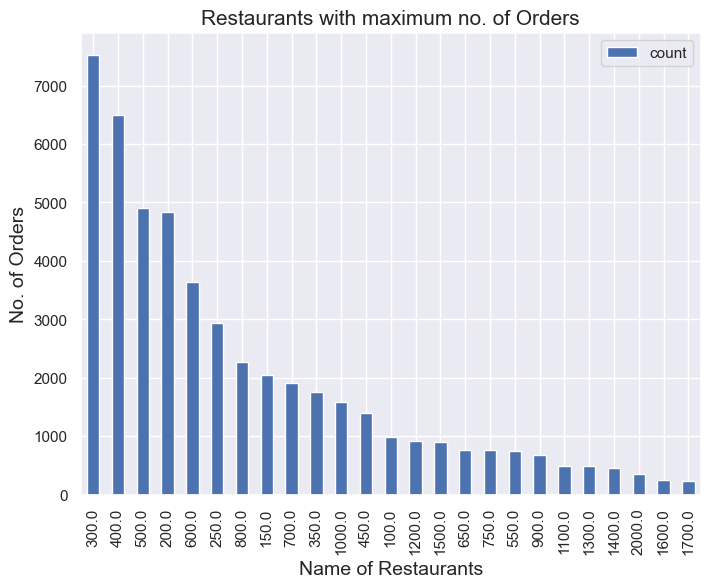

In [56]:
plt.figure(figsize=(12,5))
date=df['name'].value_counts()[:20]
data.plot(kind='bar')
plt.xlabel('Name of Restaurants',size=14)
plt.ylabel('No. of Orders',size=14)
plt.title("Restaurants with maximum no. of Orders",fontsize=15)
plt.show()

### Let's check how many restaurants have online ordering facilities

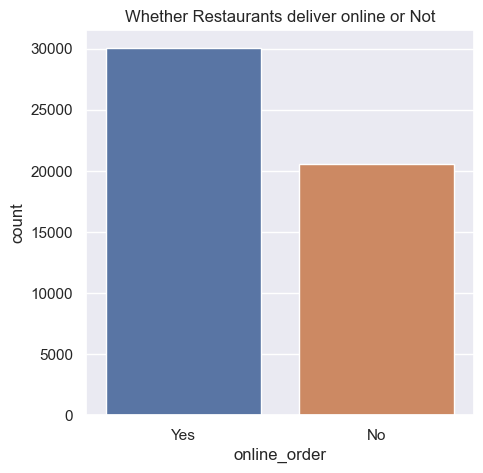

In [30]:
sns.countplot(data=df,x=df['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

### Let's check how many restaurants offer Pre-Booking Table bookings

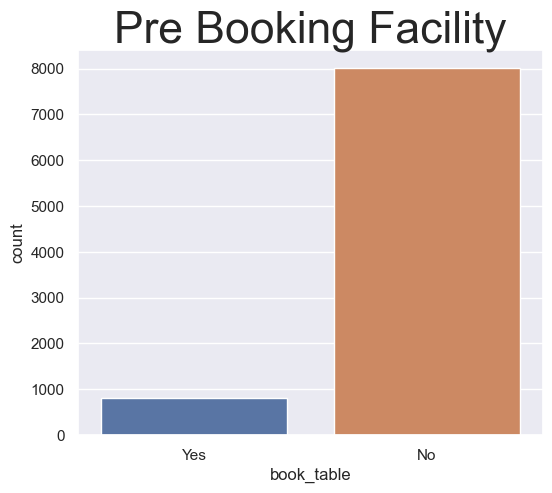

In [31]:
data=df[['name','book_table']].drop_duplicates()

plt.figure(figsize=(6,5))
fx=sns.countplot(x='book_table',data=data).set_title('Pre Booking Facility',fontsize=32)
plt.show()

### Let's check the locations that have highest orders

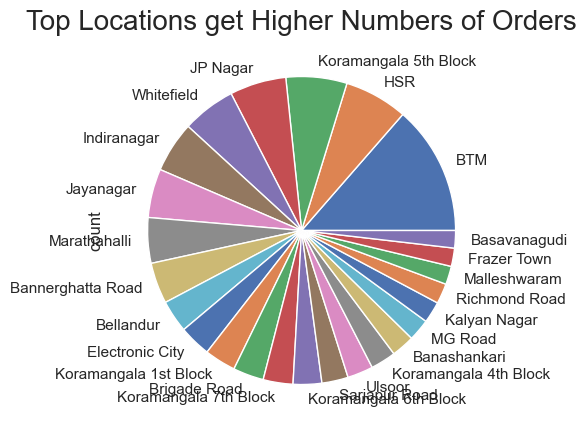

In [32]:
plt.figure(figure=(12,6))
data=df.location.value_counts()[0:25]
data.plot(kind='pie')
plt.title('Top Locations get Higher Numbers of Orders',size=20)
plt.show()

### Let's check for the most common ratings for the orders

<Axes: xlabel='rate', ylabel='Density'>

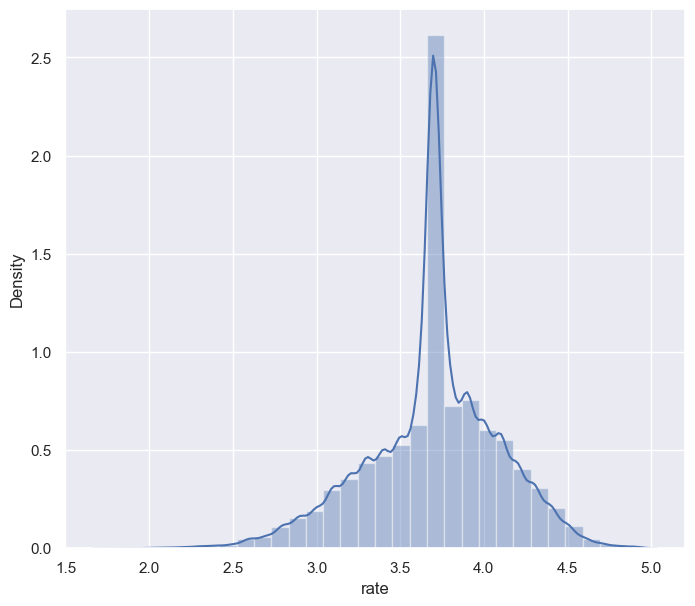

In [33]:
plt.figure(figsize=(8,7))

sns.distplot(df['rate'],bins=30)

### Let's check for the common Approximate costs for meal for two people

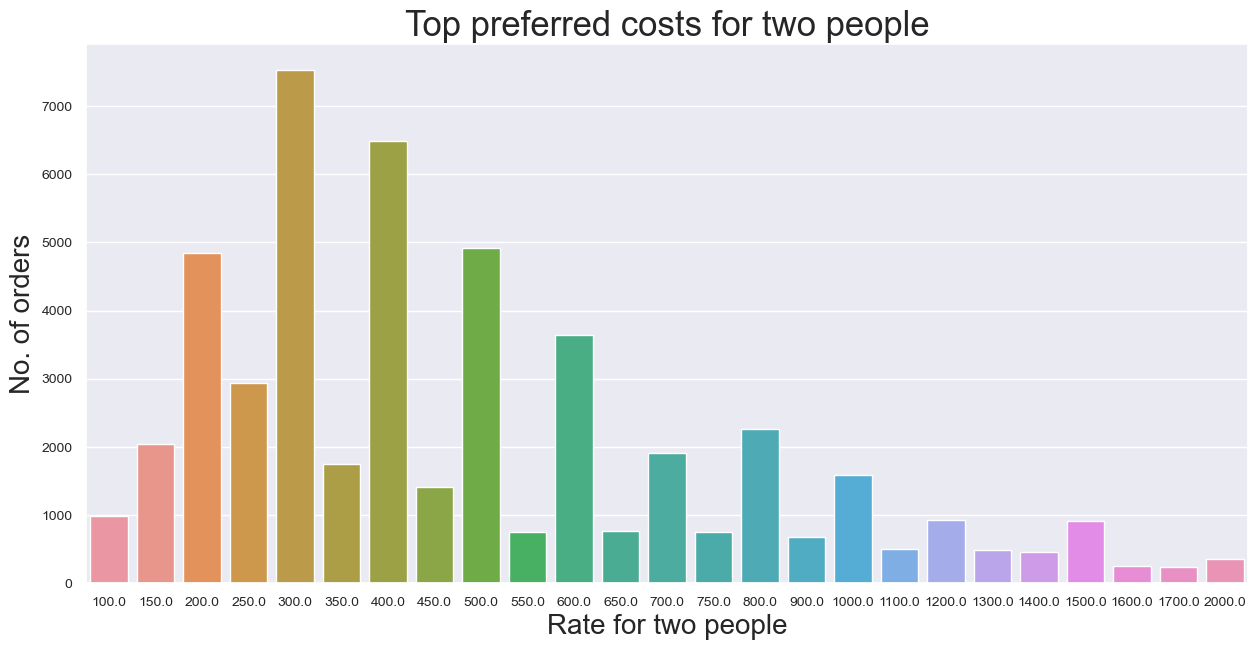

In [34]:
data=pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data.columns=['approx_cost','count']
data=data.set_index('approx_cost')
plt.figure(figsize=(15,7))
sns.barplot(x=data.index,y=data['count'])
plt.xlabel('Rate for two people',size=20)
plt.ylabel('No. of orders',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Top preferred costs for two people',size=25)
plt.show()

### Let's check top 10 types of the orders restaurants offer

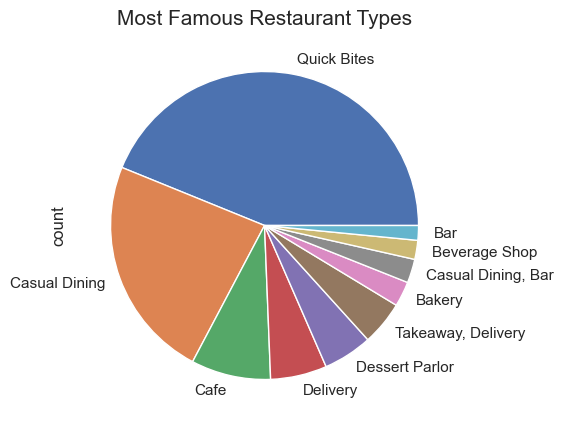

In [35]:
plt.figure(figsize=(12,5))
abc=df.rest_type.value_counts()[:10]
abc.plot(kind='pie')
plt.title('Most Famous Restaurant Types',fontsize=15)
plt.show()

### Let's check for Most famous Cusines among people

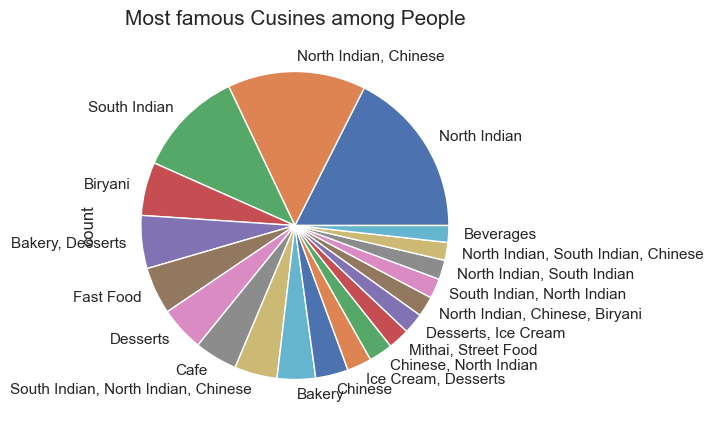

In [36]:
plt.figure(figsize=(12,5))
xyz=df.cuisines.value_counts()[:20].plot(kind='pie')
plt.title("Most famous Cusines among People",fontsize=15)
plt.show()

### Let's check for the Top Locations with Most Number of Restaurants

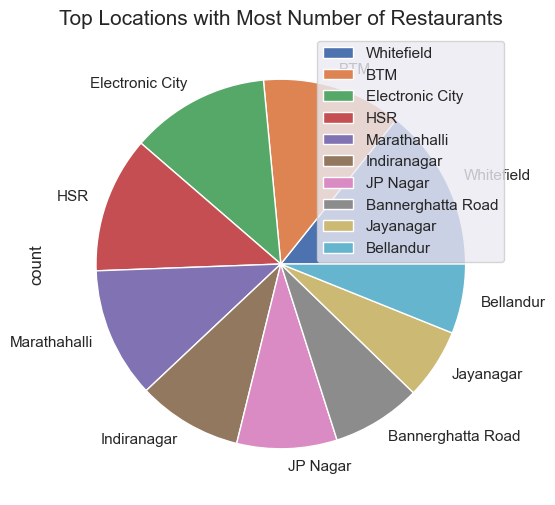

In [37]:
loc=pd.DataFrame(df.groupby(by='location')['name'].nunique())
loc.columns=['count']
loc.sort_values(by='count',ascending=False,inplace=True)
plt.rcParams['figure.figsize']=(8,6)
ax=loc[0:10].plot(kind='pie',subplots=True)
plt.title('Top Locations with Most Number of Restaurants',size=15)
plt.show()

### Let's find the relationship between the Features

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'rate'), Text(0, 1.5, 'votes'), Text(0, 2.5, 'approx_cost')])

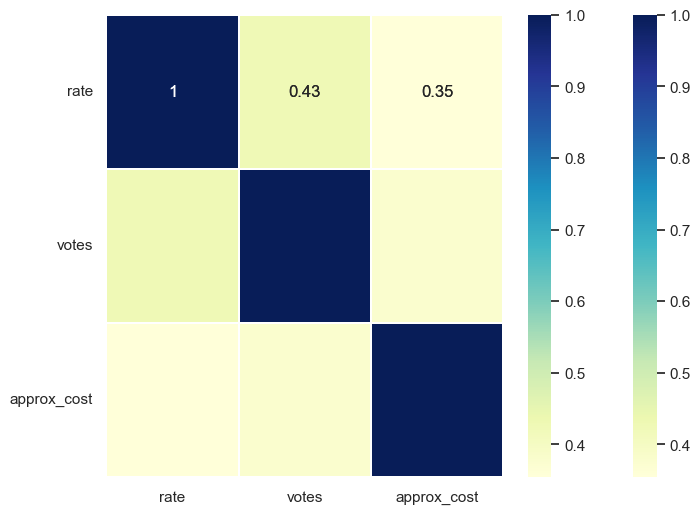

In [38]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)
sns.heatmap(df.select_dtypes(include=['number']).corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

### Let's Build Our Model

In [39]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


### Let's convert the categorical variables into a numeric format

### For the column "Online_order"

In [40]:
df.online_order[df.online_order=='Yes']=1
df.online_order[df.online_order=='No']=0


In [41]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


### For the column "book_table"

In [42]:
df.book_table[df.book_table=='Yes']=1
df.book_table[df.book_table=='No']=0


In [43]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


### For the Rest Type Column

In [47]:
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)
    
rest_df.head()

,rest_type,Bar,Takeaway,Quick Bites,Pop Up,Food Truck,Meat Shop,Sweet Shop,Confectionery,Microbrewery,...,Mess,Fine Dining,Delivery,Dhaba,Irani Cafee,Bhojanalya,Bakery,Pub,Cafe,Beverage Shop
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)       
    count+=1

In [50]:
rest_df.head()

,rest_type,Bar,Takeaway,Quick Bites,Pop Up,Food Truck,Meat Shop,Sweet Shop,Confectionery,Microbrewery,...,Mess,Fine Dining,Delivery,Dhaba,Irani Cafee,Bhojanalya,Bakery,Pub,Cafe,Beverage Shop
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Quick Bites,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
rest_df.drop(['rest_type'],axis=1,inplace=True)
rest_df.head()

,Bar,Takeaway,Quick Bites,Pop Up,Food Truck,Meat Shop,Sweet Shop,Confectionery,Microbrewery,Food Court,...,Mess,Fine Dining,Delivery,Dhaba,Irani Cafee,Bhojanalya,Bakery,Pub,Cafe,Beverage Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### For Cuisines column

In [52]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

,cuisines,Fast Food,Street Food,British,Iranian,Mexican,Drinks Only,Andhra,European,Bihari,...,Seafood,Bubble Tea,Singaporean,Bohri,Goan,Finger Food,Awadhi,Burmese,Turkish,African
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    
    count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
    
    
cuisines_df.head()

,cuisines,Fast Food,Street Food,British,Iranian,Mexican,Drinks Only,Andhra,European,Bihari,...,Seafood,Bubble Tea,Singaporean,Bohri,Goan,Finger Food,Awadhi,Burmese,Turkish,African
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Fast Food,Street Food,British,Iranian,Mexican,Drinks Only,Andhra,European,Bihari,Rajasthani,...,Seafood,Bubble Tea,Singaporean,Bohri,Goan,Finger Food,Awadhi,Burmese,Turkish,African
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### For the "Location" column

In [55]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])
